# Task 1: Permutations and Combinations

By conducting this experiment, we intend to prove whether the person’s ability to identify the preparation method of the tea cups is beyond random chance. If the person can consistently and accurately identify all six milk-first cups, the evidence would support the claim that they possess a special sensory ability. Conversely, if their success rate aligns with what would be expected by random guessing, the claim would lack statistical support.

In summary, this experiment serves as a practical application of hypothesis testing, allowing us to objectively evaluate extraordinary claims using statistical evidence.

*By setting up this experiment, we can:*

- **Quantify Confidence**: Determine the likelihood that the person’s success is due to random chance versus a genuine ability.
+ **Statistical Significance**: Establish whether the results are statistically significant, meaning the observed outcome is unlikely to have occurred under the null hypothesis.
* **Objective Evaluation**: Provide an objective framework to evaluate claims of special abilities, ensuring decisions are based on evidence and probability rather than subjective judgment.

### Permutations
    
A permutation is an ordering of its elements.

The set `{a, b, c}` has the permutations `abc`, `acb`, `bac`, `bca`, `cab`, and `cba`.

### Combinations

A combination is a selection of `k` elements from a set of size `n`.

In combinations, order does not matter and the same element cannot be selected twice.

The combinations of size 2 from the set `{a, b, c}` are `{a, b}`, `{a, c}`, and `{b, c}`.

## Lady Tasting Tea

In [36]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html#module-math
import math

# Permutations and combinations
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html#module-random
import random

# Numerical structures and operations.
# https://numpy.org/devdocs/reference/index.html#numpy-reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

1 2 3 4 5 6 7 8

Calculate the number of ways to choose **k** elements from a set of **n** elements where the order of the chosen elements does not matter and no element is selected more than once.

In [3]:
# Number of cups of tea in total.
no_cups = 8

# Number of cups of tea with milk first.
no_cups_milk_first = 4

# Number of cups of tea with tea first.
no_cups_tea_first = 4

How many possible combinations are there to shuffle the 8 cups?


In [4]:
# Number of ways of selecting four cups from eight.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

70

1 2 3 4 5 6 7 8

: _ _ _ _

==> COMBINATION

In [5]:
# Total number of ways of selecting four cups from eight, keeping them in order.
ways_ordered = 8 * 7 * 6 * 5

# Show.
ways_ordered

1680

1680 possible selections

Do you think order is important?

4 8 6 5

8 6 4 5

: _ _ _ _

==> PERMUTATION

In [6]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

24 ways of ordering 4 elements

In [7]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

70

## Formula

In mathematics, the [`math.comb()`](https://docs.python.org/3/library/math.html#math.comb') function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

**Factorial**  

**n!** = the multiplication of all positive integers, say "n", that will be smaller than or equivalent to n is known as the factorial.

**Number of cups of tea in total.**  

**n** = 8

**Number of cups of tea with milk/tea in first.**  

**k** = 4

## [math.factorial](https://docs.python.org/3/library/math.html#math.factorial)

In [8]:
# Number of cups
n = 8

# Number of cups of tea with milk/tea first.
k = 4

# Factorial on number of cups.
fact_n = math.factorial(n)

# Factorial of number of cups of tea with milk/tea first.
fact_k = math.factorial(k)

# Factorial of  number of cups - number of cups of tea with milk/tea first.
diff_n_k =  n-k
fact_diff_n_k = math.factorial(diff_n_k)

# Applying formula: COMBINATION
# No of ways of selecting k objects from n without replacement and without order.
comb = fact_n // (fact_k * fact_diff_n_k)

# Show result.
comb

70

```  
n! = 8 x 7 x 6 x 5 x 4 x 3 x 2 x 1  
k! = 4 x 3 x 2 x 1  
(n - k)! = 4 x 3 x 2 x 1  
n!/(n-k) = (8 x 7 x 6 x 5 x 4 x 3 x 2 x 1) / (4 x 3 x 2 x 1) = 8 x 7 x 6 x 5  
```  


## Ordering of Results

https://docs.python.org/3/library/itertools.html#itertools.combinations

In [9]:
# The cups labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [13]:
# Shiw the different ways of selecting no_cups+milk_first out of no_cuos cups of tea.
combs = list(itertools.combinations(labels,no_cups_milk_first))

# Show,
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

In [15]:
# Number of combinations.
len(combs)

70

In [24]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort in place.
labels_milk.sort()

# Show
labels_milk

[0, 1, 2, 4]

In [26]:
# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{0, 1, 2, 4}

In [30]:
# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    print(comb, overlap, len(overlap))
    # Append overlaps to no_overlaps.
    no_overlaps.append(len(overlap))


(0, 1, 2, 3) {0, 1, 2} 3
(0, 1, 2, 4) {0, 1, 2, 4} 4
(0, 1, 2, 5) {0, 1, 2} 3
(0, 1, 2, 6) {0, 1, 2} 3
(0, 1, 2, 7) {0, 1, 2} 3
(0, 1, 3, 4) {0, 1, 4} 3
(0, 1, 3, 5) {0, 1} 2
(0, 1, 3, 6) {0, 1} 2
(0, 1, 3, 7) {0, 1} 2
(0, 1, 4, 5) {0, 1, 4} 3
(0, 1, 4, 6) {0, 1, 4} 3
(0, 1, 4, 7) {0, 1, 4} 3
(0, 1, 5, 6) {0, 1} 2
(0, 1, 5, 7) {0, 1} 2
(0, 1, 6, 7) {0, 1} 2
(0, 2, 3, 4) {0, 2, 4} 3
(0, 2, 3, 5) {0, 2} 2
(0, 2, 3, 6) {0, 2} 2
(0, 2, 3, 7) {0, 2} 2
(0, 2, 4, 5) {0, 2, 4} 3
(0, 2, 4, 6) {0, 2, 4} 3
(0, 2, 4, 7) {0, 2, 4} 3
(0, 2, 5, 6) {0, 2} 2
(0, 2, 5, 7) {0, 2} 2
(0, 2, 6, 7) {0, 2} 2
(0, 3, 4, 5) {0, 4} 2
(0, 3, 4, 6) {0, 4} 2
(0, 3, 4, 7) {0, 4} 2
(0, 3, 5, 6) {0} 1
(0, 3, 5, 7) {0} 1
(0, 3, 6, 7) {0} 1
(0, 4, 5, 6) {0, 4} 2
(0, 4, 5, 7) {0, 4} 2
(0, 4, 6, 7) {0, 4} 2
(0, 5, 6, 7) {0} 1
(1, 2, 3, 4) {1, 2, 4} 3
(1, 2, 3, 5) {1, 2} 2
(1, 2, 3, 6) {1, 2} 2
(1, 2, 3, 7) {1, 2} 2
(1, 2, 4, 5) {1, 2, 4} 3
(1, 2, 4, 6) {1, 2, 4} 3
(1, 2, 4, 7) {1, 2, 4} 3
(1, 2, 5, 6) {1, 2} 2
(1, 2, 5, 7)

In [31]:
# Show the overlaps.
print(no_overlaps)

[3, 4, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1]


In [37]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

<BarContainer object of 5 artists>

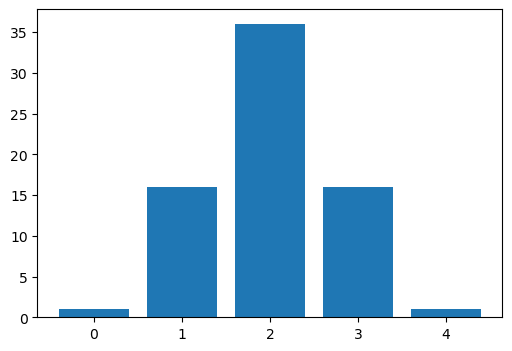

In [40]:
# Create a figure.
fig, ax = plt.subplots(figsize =(6,4))

# Bar chart.
ax.bar(counts[0], counts[1])

### The Null Hypothsis

- The lady has no special power to tell the difference between cups of tea with milk in first amd cups of tea with tea in first.  

- The lady is selecting the four cups from the eight at random.

### The Alternative Hypothesis

- The lady can tell the difference.

==> **EVIDENCE**

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea.

In [1]:
# The probability that she (randomly) selects the four correct cups.
1 / 70

0.014285714285714285

In [2]:
# The probability that she (randomly) selects at least thee correct cups.
(16 + 1) / 70

0.24285714285714285

### Type I Errors, Type II Errors, and Power

 - Type I and Type II errors: https://en.wikipedia.org/wiki/Type_I_and_type_II_errors
 - Power: https://en.wikipedia.org/wiki/Power_(statistics)

# Task 2: numpy's Normal Distribution

In [20]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

### Flipping Several Coins

In [12]:
# Flip a single coin.
coin = ["Tail", "Head"]
flip = np.random.binomial(1, 0.5)  # 0 for Tail, 1 for Head
print(coin[flip])

Head


In [16]:
# Flip a single coin several times.
flips = np.random.binomial(1,0.5,1000)# 1000 flips

# Show.
for flip in flips:
    print(coin[flip])

Tail
Head
Tail
Tail
Tail
Tail
Tail
Tail
Tail
Head
Head
Tail
Head
Tail
Head
Tail
Tail
Head
Tail
Tail
Head
Head
Head
Tail
Tail
Head
Tail
Tail
Head
Head
Tail
Head
Head
Head
Head
Tail
Head
Tail
Tail
Tail
Tail
Head
Tail
Tail
Tail
Head
Head
Head
Head
Head
Head
Head
Head
Tail
Head
Tail
Tail
Tail
Head
Tail
Tail
Tail
Head
Head
Head
Tail
Head
Head
Head
Head
Tail
Head
Tail
Tail
Tail
Head
Tail
Tail
Head
Tail
Head
Head
Tail
Tail
Head
Tail
Head
Head
Head
Tail
Tail
Head
Head
Tail
Tail
Head
Tail
Tail
Tail
Head
Head
Tail
Tail
Head
Head
Head
Tail
Tail
Tail
Tail
Head
Head
Tail
Tail
Tail
Head
Head
Tail
Head
Tail
Tail
Tail
Tail
Head
Tail
Head
Tail
Tail
Head
Head
Head
Head
Head
Tail
Head
Tail
Head
Head
Tail
Tail
Tail
Tail
Tail
Tail
Head
Tail
Head
Tail
Head
Tail
Head
Head
Head
Tail
Head
Tail
Tail
Tail
Head
Tail
Head
Head
Head
Tail
Tail
Tail
Tail
Tail
Tail
Head
Head
Head
Tail
Tail
Tail
Tail
Head
Head
Tail
Head
Head
Head
Head
Tail
Tail
Head
Head
Head
Tail
Head
Tail
Tail
Tail
Head
Tail
Head
Head
Head
Head
Head


In [19]:
# Count heads.
heads = flips.sum()

# Count tails (total flips - heads)
tails = len(flips) - heads

# Show results
print(f"Heads: {heads}")
print(f"Tails: {tails}")

Heads: 492
Tails: 508


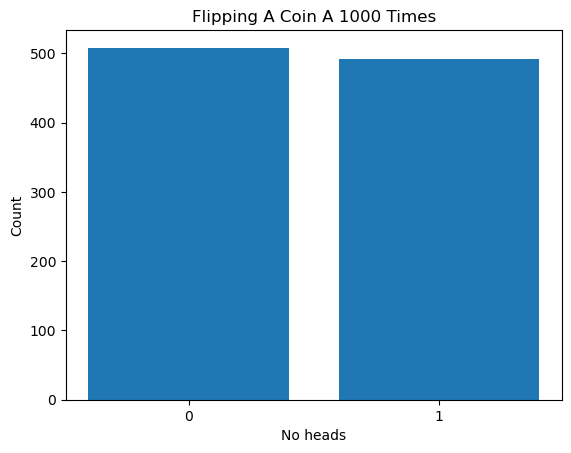

In [26]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - heads, heads])

# Add x labels.
ax.set_xticks([0, 1])

# Add title.
ax.set_title('Flipping A Coin A 1000 Times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

In [30]:
# Flip two coins several times.
twoflips = np.random.binomial(2,0.5,1000)# 1000 flips

# Show.
twoflips

array([0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       1, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0,
       0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,

In [32]:
# Count the number of times each value occurs.
uniques, counts = np.unique(twoflips, return_counts=True)

# Show.
uniques, counts

(array([0, 1, 2]), array([239, 494, 267]))

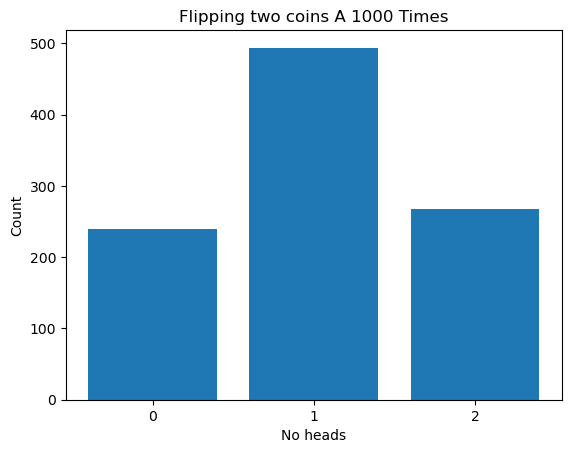

In [35]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Add x labels.
ax.set_xticks([0, 1, 2])

# Add title.
ax.set_title('Flipping two coins A 1000 Times')

# Add y label.
ax.set_xlabel('No heads')
ax.set_ylabel('Count')

# Show.
plt.show();

In [36]:
# Flip two coins several times keeping the individual results.
twoflipsind = np.random.binomial(1,0.5, (1000, 2))

# Show.
twoflipsind

array([[1, 0],
       [1, 1],
       [0, 0],
       ...,
       [1, 0],
       [0, 0],
       [0, 0]])

### Probability Density Function

In [38]:
# Count the number of times each value occurs.
np.unique(twoflipsind, return_counts=True, axis =0)

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([250, 250, 257, 243]))

### Integration

### Shapiro-Wilk Test

### Central Limit Theorem

# Task 3: t-Test Calculation

# Task 4: ANOVA